In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the data
data = pd.read_csv('new_synthetic_data_credit_assigned.csv')

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Define the ColumnTransformer
# Remove the 'sparse' argument from OneHotEncoder
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(drop='first', handle_unknown='ignore'), # Remove 'sparse=False' and handle unknown values
     ['GENDER', 'MARITAL STATUS', 'ARE YOU THE PRIMARY EARNER OF YOUR FAMILY ?',
      'SKILL 1', 'SKILL 2', 'SKILL 3',
      'DO YOU HAVE ANY CERTIFICATION OF THE ABOVE-MENTIONED SKILL SET?',
      'OWNERSHIP ( includes Land,machine)',
      'Relation with primary earner ?']),
    ('tnf2', OrdinalEncoder(categories=[['Class III','Class IV', 'Class V','Class v', 'ClassV', 'Class VI', 'Class VII', 'Class VIII', 'Class IX','HS', 'HSLC', 'BA Ongoing', 'BCom','B Com', 'BA ','BA', 'BSc', 'MSc', 'MCA', 'PhD']]),
     ['WHAT IS YOUR HIGHEST EDUCATIONAL QUALIFICATION?']),

], remainder='passthrough')

In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_transformed = transformer.fit_transform(X_train)

# Transform the test data
X_test_transformed = transformer.transform(X_test)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False) # Set with_mean=False to disable centering
X_train_transformed = sc.fit_transform(X_train_transformed)
X_test_transformed = sc.transform(X_test_transformed)

In [5]:
# Train logistic regression model
logreg = LogisticRegression(solver='saga',penalty='l1',C=0.1)
logreg.fit(X_train_transformed, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [6]:
y_pred_train = logreg.predict(X_train_transformed)
accuracy_score(y_train, y_pred_train)          ## accuracy on the training set

0.875

In [7]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(logreg, X_train_transformed, y_train, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')                          #k-fold cross validation accuracy

Cross-Validation Results (Accuracy): [0.825   0.825   0.81875 0.85625 0.8875 ]
Mean Accuracy: 0.8425


In [8]:
y_pred_test = logreg.predict(X_test_transformed)
accuracy_score(y_test, y_pred_test)       ## accuracy on the test set


0.79

In [9]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.790
Precision: 0.750
Recall: 0.857
F1 Score: 0.800


In [ ]:
# Robustness Analysis
print("\n--- Robustness Analysis ---")


--- Robustness Analysis ---


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_proba, pos_label=1, title='ROC Curve', color='darkorange'):
    """
    Plots an ROC curve using true labels and predicted probabilities.
    """
    # Compute the ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_proba, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(y_true, y_proba, pos_label=1, title='Precision-Recall Curve', color='blue'):
    """
    Plots a Precision-Recall curve using true labels and predicted probabilities.
    """
    # Compute the precision-recall curve and average precision
    precision, recall, _ = precision_recall_curve(y_true, y_proba, pos_label=pos_label)
    avg_precision = average_precision_score(y_true, y_proba, pos_label=pos_label)

    # Plotting the Precision-Recall curve
    plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, color=color, lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()


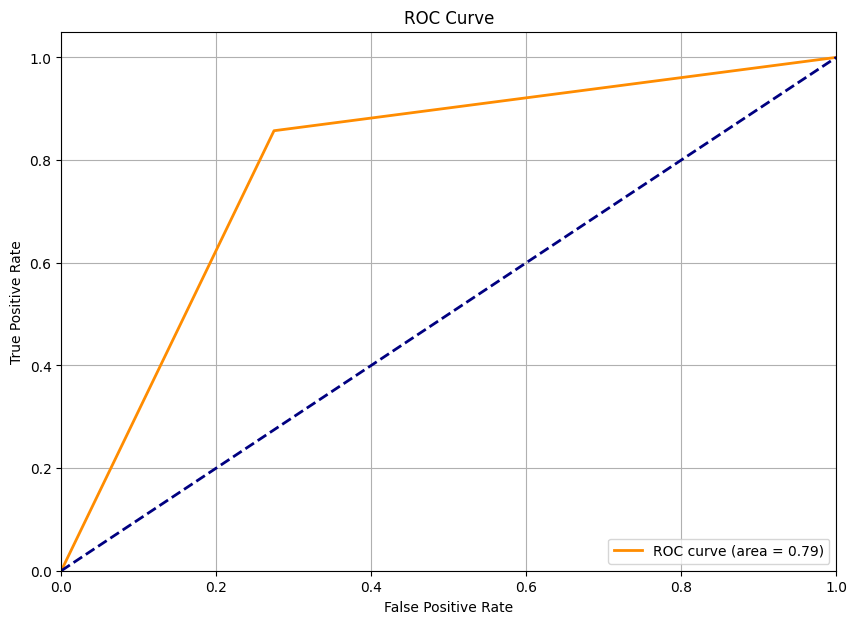

In [12]:
plot_roc_curve(y_test, y_pred_test, pos_label=1)

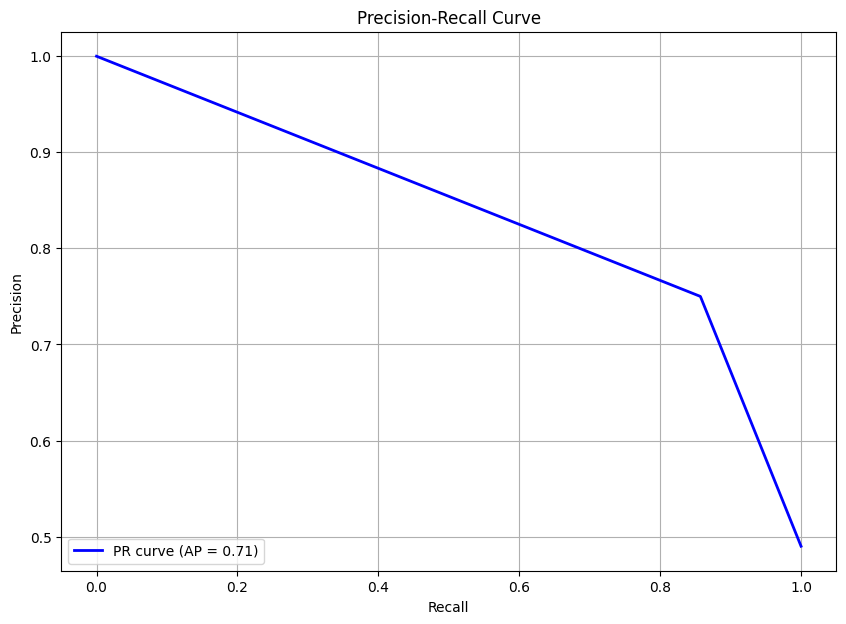

In [13]:
plot_precision_recall_curve(y_test, y_pred_test, pos_label=1)